# Exploratory Data Analysis

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure


In [3]:
data = pd.read_csv('data/data_merged.csv')

In [6]:
data.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [12]:
features = list(data.columns)

# Taking an overview of the data

In [22]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [35]:
obj_cols = list(data.select_dtypes(include='object'))
(obj_cols)

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

In [36]:
numeric_cols = list(data.select_dtypes(exclude='object'))
(numeric_cols)

['applicant_id',
 'Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

From the above Data we can infer that there are 12 numeric cols and 15 non-numeric cols.

<AxesSubplot:>

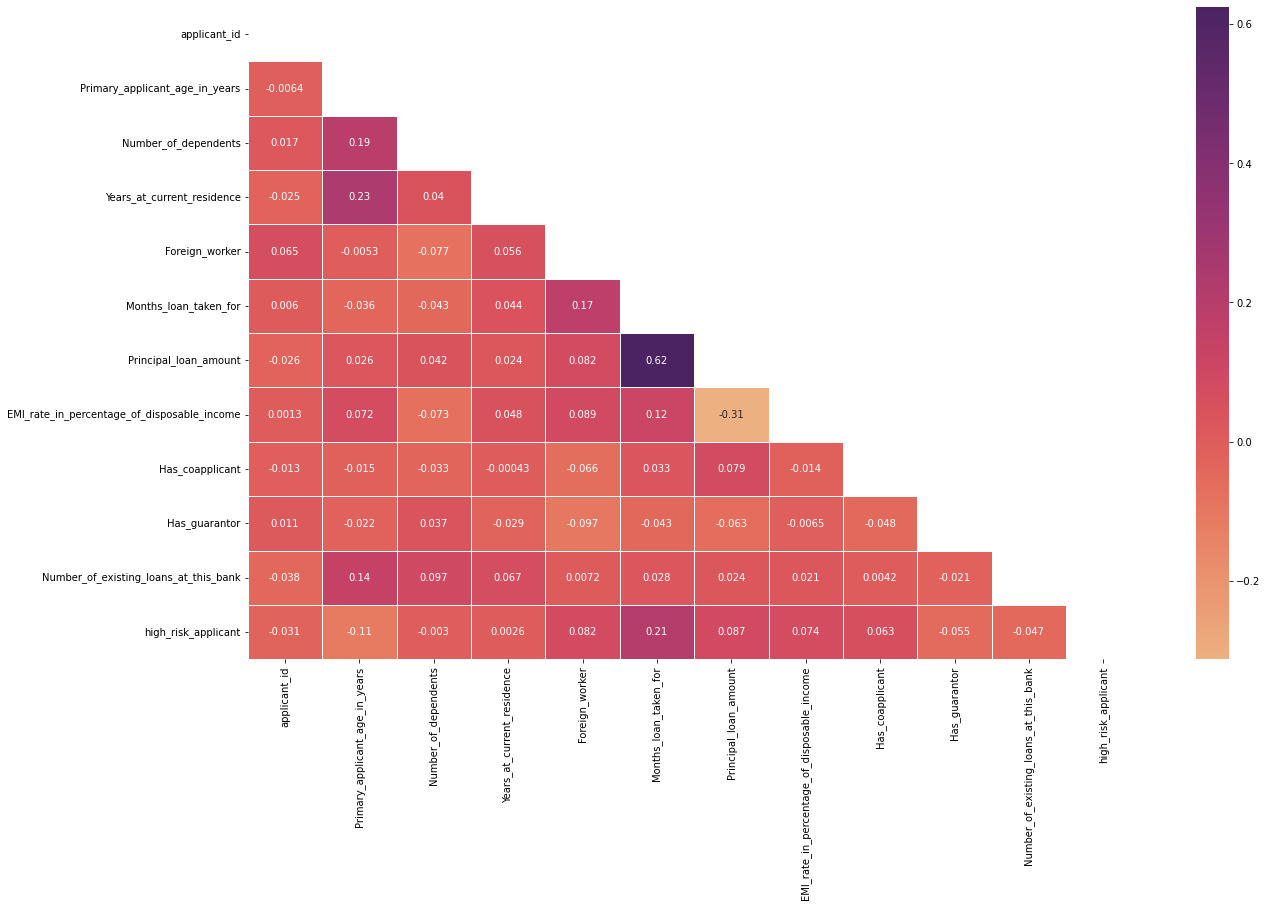

In [29]:
figure(figsize=(20, 12))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

<h3><b>Insights of the correlations</b></h3>
<li>Duration for which the loan was taken is higly correlated with applicant being a defaulter.</li>
<li>The more is the age of the applicant the more loans he might take</li>
<li>The more is the principal amount the more Longer it gets.</li>
<li>The more is the age of the applicant the longer he is supposed to live at the same residence.</li>
<li>Foreign Workers usually take Bigger and longer loans.</li>
<li>The More the dependants the more loans a person takes</li>
<li>The more the applicants age the more people depend on him</li>
<br>
<li> We must also obeserve that there are 12 cols in the above plot which means there are 15 cols with no-numeric datatype</li>

<br>
<br>
<br>

<b>All the above made conclusions are logically correct and hence, we can also conclude that the data is natural and not artificially made.</b>


# Exploring Each Feature one by one

In [28]:
len(data[features[0]].unique())

1000

Hence we